### Pandas (Python Data Analysis Library)

* `Pandas`는 파이썬에서 사용하는 데이터분석라이브러리로 행과 열로 이루어진 데이터객체를 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터를 처리하는 데 매우 유용한 도구이다.
* pands에서는 기본적으로 정의되어 있는 `1차원 배열인 Series`와 `2차원 배열인 DataFrame`을 사용한다.
* pandas의 자료구조들은 빅데이터분석에 있어 높은 수준의 성능을 보여 준다.


#### 참고 Site

* pandas문서 : http://pandas.pydata.org/pandas-docs/stable/index.html
* 자료구조 : http://pandas.pydata.org/pandas-docs/stable/dsintro.html

#### Pandas Cheat Sheet
<img src="./images/23.데이터분석_pandas_01_cheat_sheet-1.png">
<img src="./images/23.데이터분석_pandas_01_cheat_sheet-2.png">

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pd.__version__
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : db08276bc116c438d3fdee492026f8223584c477
python           : 3.8.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : Korean_Korea.949

pandas           : 1.1.3
numpy            : 1.19.2
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.2.4
setuptools       : 50.3.1.post20201107
Cython           : 0.29.21
pytest           : 6.1.1
hypothesis       : None
sphinx           : 3.2.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.7
lxml.etree       : 4.6.1
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.19.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck       : 1.3

In [5]:
!pip show pandas

Name: pandas
Version: 1.1.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\anaconda3\lib\site-packages
Requires: python-dateutil, numpy, pytz
Required-by: statsmodels, seaborn


In [8]:
# 한글처리
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf')\
                .get_name()
rc('font', family=font_name)
rc('axes', unicode_minus=False) # -표시를 안깨지도록 하는 옵션

#### Pandas 자료구조

<img src="./images/23.데이터분석_pandas_02_자료구조.png" width="400" height="300">

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    NaN
6    6.0
7    7.0
8    8.0
dtype: float64


<AxesSubplot:>

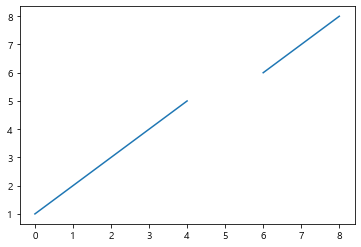

In [14]:
# 1. Series
ser1 = pd.Series([1,2,3,4,5,np.nan,6,7,8])
print(ser1)
# ser1 = pd.Series([1,2,3,4,5,np.nan,6,7,8,print])
ser1.plot()

In [19]:
ser1 = pd.Series([3,6,9,12], index=None)
ser1

ser2 = pd.Series([3,6,9,12], index=['2016', '2017', '2018', '2019'])
ser2

print(ser2[0], '=', ser2['2016'])

3 = 3


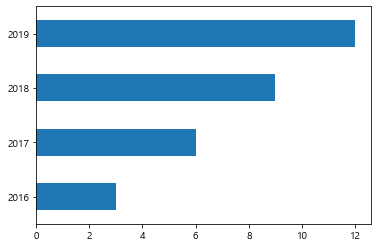

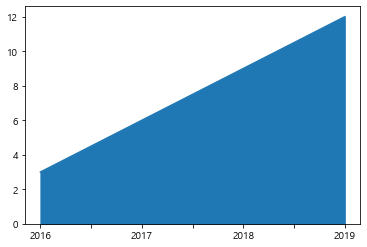

In [28]:
ser2.plot(kind='barh')
plt.show()

ser2.plot(kind='area')
plt.show()

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


<AxesSubplot:>

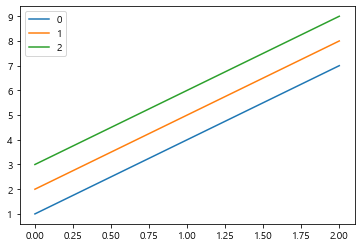

In [31]:
# 2. DataFrame
df = pd.DataFrame([[1,2,3],[4,5,6], [7,8,9]])
display(df)
df.plot()

In [34]:
df = pd.DataFrame({
    '체중':[80,70,65.5,45.9,70.4],
    '신장':[168,180,178,160,158],
    '성별':['F', 'M', 'M', 'F', 'F']
}, index=['소향', ' 홍길동', '손흥민', '홍길순', '홍길자'])
df

,체중,신장,성별
소향,80.0,168,F
홍길동,70.0,180,M
손흥민,65.5,178,M
홍길순,45.9,160,F
홍길자,70.4,158,F


In [38]:
# 접근방법
df['신장']
df.신장

# 신장 = 180만
df[df.신장==180]

,체중,신장,성별
홍길동,70.0,180,M


<AxesSubplot:>

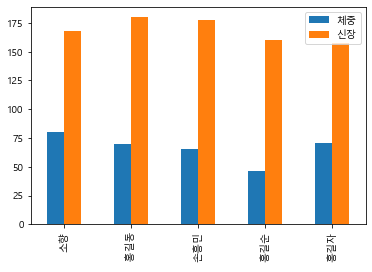

In [42]:
# 1. 성별이 남자인 사람만 추출
df[df.성별=='M']

# 2. 신장이 170이상
df[df.신장 >= 170]

# 3. 시각(line그래프)
df.plot(kind='bar')

In [45]:
# pd 외부데이터 처리하기
df = pd.read_csv('./data/save.csv', header=None)
df

,0,1,2,3
0,17426,10787,9026,15258
1,13168,33000,4810,16652
2,7373,31375,31301,6027
3,25073,13864,20420,26082
4,19212,2055,3558,17512
5,39964,36045,12029,10859
6,15017,34399,9662,36189
7,35344,19354,12247,33753
8,39217,26341,39092,31013
9,33590,34227,34090,17432


In [46]:
df = pd.read_csv('./data/input.csv')
df

,Supplier Name,Invoice Number,Part Number,Cost,Purchase Date
0,A,001-1001,2341,500,2014-01-20
1,A,001-1001,2341,500,2014-01-20
2,A,001-1001,2342,750,2014-01-20
3,A,001-1001,2342,750,2014-01-20
4,B,50-9501,7009,250,2018-01-30
5,B,50-9501,7009,250,2018-01-30
6,B,50-9501,6650,125,2018-02-03
7,B,50-9501,6650,12,2018-02-03
8,C,920-4803,3321,615,2017-02-03
9,C,920-4804,3321,615,2017-02-10


<AxesSubplot:>

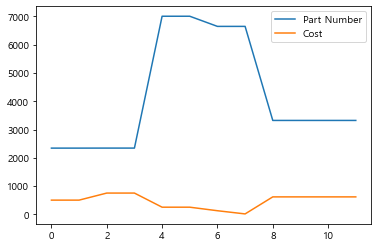

In [47]:
df.plot()

In [50]:
input_file = './data/input.csv'
output_file = './data/output.csv'

In [51]:
df = pd.read_csv(input_file)
df

,Supplier Name,Invoice Number,Part Number,Cost,Purchase Date
0,A,001-1001,2341,500,2014-01-20
1,A,001-1001,2341,500,2014-01-20
2,A,001-1001,2342,750,2014-01-20
3,A,001-1001,2342,750,2014-01-20
4,B,50-9501,7009,250,2018-01-30
5,B,50-9501,7009,250,2018-01-30
6,B,50-9501,6650,125,2018-02-03
7,B,50-9501,6650,12,2018-02-03
8,C,920-4803,3321,615,2017-02-03
9,C,920-4804,3321,615,2017-02-10


In [62]:
df[df['Supplier Name']=='B'] 

,Supplier Name,Invoice Number,Part Number,Cost,Purchase Date
4,B,50-9501,7009,250,2018-01-30
5,B,50-9501,7009,250,2018-01-30
6,B,50-9501,6650,125,2018-02-03
7,B,50-9501,6650,12,2018-02-03


In [60]:
df[df['Cost'] <=200]

,Supplier Name,Invoice Number,Part Number,Cost,Purchase Date
6,B,50-9501,6650,125,2018-02-03
7,B,50-9501,6650,12,2018-02-03


In [70]:
result = df.loc[(df['Supplier Name'].str.contains('B')) | (df['Cost'] < 200) , :]
result
result.to_csv(output_file, index=False)

#### 실습 - 영화평점데이터

In [83]:
df_movies = pd.read_csv('./data/ml-1m/movies.dat', delimiter="::", engine='python',
                       header=None)
df_ratings = pd.read_csv('./data/ml-1m/ratings.dat', delimiter="::", engine='python',
                        header=None)

In [84]:
df_movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [85]:
df_ratings.tail()

,0,1,2,3
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [89]:
df_movies.columns=['movieid', 'title', 'genres']

In [91]:
df_ratings.columns=['userid', 'movieid', 'rating', 'timestamp']

In [94]:
# 1. 전체평균평점
display(f'영화평균평점: {df_ratings["rating"].mean()}')

'영화평균평점: 3.581564453029317'

In [99]:
# 2. 사용자별 영화평균평점
for i in range(1, np.unique(df_ratings['userid']).size+1):
    print("사용자ID=", i, end=", ")
    print('평점평균=', df_ratings.loc[df_ratings['userid']==i, 'rating'].mean())

사용자ID= 1, 평점평균= 4.188679245283019
사용자ID= 2, 평점평균= 3.7131782945736433
사용자ID= 3, 평점평균= 3.9019607843137254
사용자ID= 4, 평점평균= 4.190476190476191
사용자ID= 5, 평점평균= 3.1464646464646466
사용자ID= 6, 평점평균= 3.9014084507042255
사용자ID= 7, 평점평균= 4.32258064516129
사용자ID= 8, 평점평균= 3.884892086330935
사용자ID= 9, 평점평균= 3.7358490566037736
사용자ID= 10, 평점평균= 4.114713216957606
사용자ID= 11, 평점평균= 3.2773722627737225
사용자ID= 12, 평점평균= 3.8260869565217392
사용자ID= 13, 평점평균= 3.388888888888889
사용자ID= 14, 평점평균= 3.32
사용자ID= 15, 평점평균= 3.3233830845771144
사용자ID= 16, 평점평균= 3.0285714285714285
사용자ID= 17, 평점평균= 4.075829383886256
사용자ID= 18, 평점평균= 3.6491803278688524
사용자ID= 19, 평점평균= 3.5725490196078433
사용자ID= 20, 평점평균= 4.083333333333333
사용자ID= 21, 평점평균= 2.909090909090909
사용자ID= 22, 평점평균= 3.0673400673400675
사용자ID= 23, 평점평균= 3.3157894736842106
사용자ID= 24, 평점평균= 3.948529411764706
사용자ID= 25, 평점평균= 3.7411764705882353
사용자ID= 26, 평점평균= 2.96
사용자ID= 27, 평점평균= 4.171428571428572
사용자ID= 28, 평점평균= 3.7570093457943927
사용자ID= 29, 평점평균= 3.5833333333333335
사용자ID

사용자ID= 277, 평점평균= 3.727272727272727
사용자ID= 278, 평점평균= 3.9646464646464645
사용자ID= 279, 평점평균= 2.872340425531915
사용자ID= 280, 평점평균= 3.94
사용자ID= 281, 평점평균= 3.891891891891892
사용자ID= 282, 평점평균= 3.5172413793103448
사용자ID= 283, 평점평균= 4.962962962962963
사용자ID= 284, 평점평균= 3.021231422505308
사용자ID= 285, 평점평균= 4.16546762589928
사용자ID= 286, 평점평균= 3.883720930232558
사용자ID= 287, 평점평균= 3.70873786407767
사용자ID= 288, 평점평균= 4.589285714285714
사용자ID= 289, 평점평균= 3.9054054054054053
사용자ID= 290, 평점평균= 3.303030303030303
사용자ID= 291, 평점평균= 4.137254901960785
사용자ID= 292, 평점평균= 3.7560975609756095
사용자ID= 293, 평점평균= 3.2460567823343847
사용자ID= 294, 평점평균= 3.489795918367347
사용자ID= 295, 평점평균= 3.764397905759162
사용자ID= 296, 평점평균= 3.597938144329897
사용자ID= 297, 평점평균= 4.0
사용자ID= 298, 평점평균= 3.925925925925926
사용자ID= 299, 평점평균= 4.163461538461538
사용자ID= 300, 평점평균= 4.180722891566265
사용자ID= 301, 평점평균= 3.8011204481792715
사용자ID= 302, 평점평균= 2.8692893401015227
사용자ID= 303, 평점평균= 3.861244019138756
사용자ID= 304, 평점평균= 3.5555555555555554
사용자ID= 305, 평

사용자ID= 515, 평점평균= 3.728395061728395
사용자ID= 516, 평점평균= 2.931972789115646
사용자ID= 517, 평점평균= 3.963855421686747
사용자ID= 518, 평점평균= 4.3478260869565215
사용자ID= 519, 평점평균= 3.3777777777777778
사용자ID= 520, 평점평균= 3.9363057324840764
사용자ID= 521, 평점평균= 4.2926829268292686
사용자ID= 522, 평점평균= 3.8448275862068964
사용자ID= 523, 평점평균= 4.06
사용자ID= 524, 평점평균= 3.608267716535433
사용자ID= 525, 평점평균= 4.025
사용자ID= 526, 평점평균= 3.896551724137931
사용자ID= 527, 평점평균= 4.08
사용자ID= 528, 평점평균= 3.3551724137931034
사용자ID= 529, 평점평균= 4.19672131147541
사용자ID= 530, 평점평균= 4.0
사용자ID= 531, 평점평균= 3.1591695501730106
사용자ID= 532, 평점평균= 3.86046511627907
사용자ID= 533, 평점평균= 3.3401015228426396
사용자ID= 534, 평점평균= 3.7475728155339807
사용자ID= 535, 평점평균= 3.5714285714285716
사용자ID= 536, 평점평균= 3.942857142857143
사용자ID= 537, 평점평균= 4.3061224489795915
사용자ID= 538, 평점평균= 4.458333333333333
사용자ID= 539, 평점평균= 3.9242424242424243
사용자ID= 540, 평점평균= 3.230769230769231
사용자ID= 541, 평점평균= 3.1894736842105265
사용자ID= 542, 평점평균= 3.764705882352941
사용자ID= 543, 평점평균= 4.0789865871833

사용자ID= 831, 평점평균= 4.105263157894737
사용자ID= 832, 평점평균= 3.558139534883721
사용자ID= 833, 평점평균= 4.0476190476190474
사용자ID= 834, 평점평균= 4.16
사용자ID= 835, 평점평균= 2.75
사용자ID= 836, 평점평균= 2.4
사용자ID= 837, 평점평균= 3.260869565217391
사용자ID= 838, 평점평균= 4.090909090909091
사용자ID= 839, 평점평균= 3.988372093023256
사용자ID= 840, 평점평균= 4.219123505976095
사용자ID= 841, 평점평균= 3.576923076923077
사용자ID= 842, 평점평균= 3.8378378378378377
사용자ID= 843, 평점평균= 3.9444444444444446
사용자ID= 844, 평점평균= 3.4523809523809526
사용자ID= 845, 평점평균= 3.980769230769231
사용자ID= 846, 평점평균= 3.91699604743083
사용자ID= 847, 평점평균= 3.6129032258064515
사용자ID= 848, 평점평균= 4.178571428571429
사용자ID= 849, 평점평균= 3.264957264957265
사용자ID= 850, 평점평균= 3.5613718411552346
사용자ID= 851, 평점평균= 3.5921052631578947
사용자ID= 852, 평점평균= 4.117647058823529
사용자ID= 853, 평점평균= 3.890909090909091
사용자ID= 854, 평점평균= 3.027667984189723
사용자ID= 855, 평점평균= 3.4126984126984126
사용자ID= 856, 평점평균= 3.490566037735849
사용자ID= 857, 평점평균= 4.171428571428572
사용자ID= 858, 평점평균= 4.189473684210526
사용자ID= 859, 평점평균= 3.45098

사용자ID= 1068, 평점평균= 3.7336683417085426
사용자ID= 1069, 평점평균= 2.87192118226601
사용자ID= 1070, 평점평균= 3.619047619047619
사용자ID= 1071, 평점평균= 4.426573426573427
사용자ID= 1072, 평점평균= 4.0476190476190474
사용자ID= 1073, 평점평균= 4.146551724137931
사용자ID= 1074, 평점평균= 3.4479166666666665
사용자ID= 1075, 평점평균= 4.048780487804878
사용자ID= 1076, 평점평균= 3.2439024390243905
사용자ID= 1077, 평점평균= 4.019417475728155
사용자ID= 1078, 평점평균= 3.984251968503937
사용자ID= 1079, 평점평균= 3.5867768595041323
사용자ID= 1080, 평점평균= 3.740740740740741
사용자ID= 1081, 평점평균= 4.147058823529412
사용자ID= 1082, 평점평균= 4.333333333333333
사용자ID= 1083, 평점평균= 2.6923076923076925
사용자ID= 1084, 평점평균= 3.15
사용자ID= 1085, 평점평균= 3.7142857142857144
사용자ID= 1086, 평점평균= 3.8621794871794872
사용자ID= 1087, 평점평균= 3.7908163265306123
사용자ID= 1088, 평점평균= 3.3375850340136055
사용자ID= 1089, 평점평균= 4.0
사용자ID= 1090, 평점평균= 3.3698630136986303
사용자ID= 1091, 평점평균= 2.696969696969697
사용자ID= 1092, 평점평균= 4.0588235294117645
사용자ID= 1093, 평점평균= 3.3857142857142857
사용자ID= 1094, 평점평균= 3.6219512195121952
사용자ID= 1095, 평점

사용자ID= 1309, 평점평균= 3.7083333333333335
사용자ID= 1310, 평점평균= 3.75
사용자ID= 1311, 평점평균= 3.478723404255319
사용자ID= 1312, 평점평균= 3.270967741935484
사용자ID= 1313, 평점평균= 3.6551724137931036
사용자ID= 1314, 평점평균= 2.789473684210526
사용자ID= 1315, 평점평균= 4.505376344086022
사용자ID= 1316, 평점평균= 3.236842105263158
사용자ID= 1317, 평점평균= 3.6620775969962454
사용자ID= 1318, 평점평균= 3.0476190476190474
사용자ID= 1319, 평점평균= 3.2142857142857144
사용자ID= 1320, 평점평균= 4.017094017094017
사용자ID= 1321, 평점평균= 3.2923976608187133
사용자ID= 1322, 평점평균= 4.1171875
사용자ID= 1323, 평점평균= 3.7027027027027026
사용자ID= 1324, 평점평균= 4.037037037037037
사용자ID= 1325, 평점평균= 3.9858156028368796
사용자ID= 1326, 평점평균= 3.918918918918919
사용자ID= 1327, 평점평균= 3.507042253521127
사용자ID= 1328, 평점평균= 3.552
사용자ID= 1329, 평점평균= 3.2853658536585364
사용자ID= 1330, 평점평균= 4.260869565217392
사용자ID= 1331, 평점평균= 3.98
사용자ID= 1332, 평점평균= 3.5
사용자ID= 1333, 평점평균= 3.6965888689407542
사용자ID= 1334, 평점평균= 3.9152542372881354
사용자ID= 1335, 평점평균= 3.0749185667752443
사용자ID= 1336, 평점평균= 4.086956521739131
사용자ID= 1337,

사용자ID= 1570, 평점평균= 3.5454545454545454
사용자ID= 1571, 평점평균= 3.947712418300654
사용자ID= 1572, 평점평균= 3.1777777777777776
사용자ID= 1573, 평점평균= 3.689655172413793
사용자ID= 1574, 평점평균= 3.5961538461538463
사용자ID= 1575, 평점평균= 3.8703703703703702
사용자ID= 1576, 평점평균= 3.875
사용자ID= 1577, 평점평균= 4.104
사용자ID= 1578, 평점평균= 4.161290322580645
사용자ID= 1579, 평점평균= 3.4496732026143793
사용자ID= 1580, 평점평균= 3.5405405405405403
사용자ID= 1581, 평점평균= 3.2195121951219514
사용자ID= 1582, 평점평균= 3.6363636363636362
사용자ID= 1583, 평점평균= 3.730769230769231
사용자ID= 1584, 평점평균= 3.3253796095444685
사용자ID= 1585, 평점평균= 3.607142857142857
사용자ID= 1586, 평점평균= 4.424096385542168
사용자ID= 1587, 평점평균= 3.332129963898917
사용자ID= 1588, 평점평균= 4.170212765957447
사용자ID= 1589, 평점평균= 3.7777777777777777
사용자ID= 1590, 평점평균= 4.0
사용자ID= 1591, 평점평균= 4.340764331210191
사용자ID= 1592, 평점평균= 3.6209150326797386
사용자ID= 1593, 평점평균= 3.0388349514563107
사용자ID= 1594, 평점평균= 3.727891156462585
사용자ID= 1595, 평점평균= 4.045112781954887
사용자ID= 1596, 평점평균= 3.5652173913043477
사용자ID= 1597, 평점평균= 3.55652

사용자ID= 1839, 평점평균= 3.9770114942528734
사용자ID= 1840, 평점평균= 3.9166666666666665
사용자ID= 1841, 평점평균= 2.7180616740088106
사용자ID= 1842, 평점평균= 4.129032258064516
사용자ID= 1843, 평점평균= 3.689075630252101
사용자ID= 1844, 평점평균= 3.65
사용자ID= 1845, 평점평균= 3.213636363636364
사용자ID= 1846, 평점평균= 4.032786885245901
사용자ID= 1847, 평점평균= 4.317073170731708
사용자ID= 1848, 평점평균= 3.772727272727273
사용자ID= 1849, 평점평균= 3.7083333333333335
사용자ID= 1850, 평점평균= 3.844155844155844
사용자ID= 1851, 평점평균= 2.6984126984126986
사용자ID= 1852, 평점평균= 3.5185185185185186
사용자ID= 1853, 평점평균= 4.1210191082802545
사용자ID= 1854, 평점평균= 2.817073170731707
사용자ID= 1855, 평점평균= 3.144578313253012
사용자ID= 1856, 평점평균= 4.6940298507462686
사용자ID= 1857, 평점평균= 4.2682926829268295
사용자ID= 1858, 평점평균= 3.9591836734693877
사용자ID= 1859, 평점평균= 3.5652173913043477
사용자ID= 1860, 평점평균= 3.310580204778157
사용자ID= 1861, 평점평균= 3.3369565217391304
사용자ID= 1862, 평점평균= 4.4
사용자ID= 1863, 평점평균= 4.5
사용자ID= 1864, 평점평균= 3.3043478260869565
사용자ID= 1865, 평점평균= 3.5808383233532934
사용자ID= 1866, 평점평균= 4.0935251

사용자ID= 2090, 평점평균= 3.7729257641921397
사용자ID= 2091, 평점평균= 4.08843537414966
사용자ID= 2092, 평점평균= 3.5665294924554183
사용자ID= 2093, 평점평균= 3.482142857142857
사용자ID= 2094, 평점평균= 4.056338028169014
사용자ID= 2095, 평점평균= 3.36
사용자ID= 2096, 평점평균= 4.181818181818182
사용자ID= 2097, 평점평균= 3.293103448275862
사용자ID= 2098, 평점평균= 3.2493297587131367
사용자ID= 2099, 평점평균= 3.5277777777777777
사용자ID= 2100, 평점평균= 3.707792207792208
사용자ID= 2101, 평점평균= 3.3047619047619046
사용자ID= 2102, 평점평균= 2.6452830188679246
사용자ID= 2103, 평점평균= 3.865168539325843
사용자ID= 2104, 평점평균= 3.0943396226415096
사용자ID= 2105, 평점평균= 3.2224371373307545
사용자ID= 2106, 평점평균= 2.2455555555555557
사용자ID= 2107, 평점평균= 4.068965517241379
사용자ID= 2108, 평점평균= 4.363636363636363
사용자ID= 2109, 평점평균= 2.897196261682243
사용자ID= 2110, 평점평균= 3.239819004524887
사용자ID= 2111, 평점평균= 3.75
사용자ID= 2112, 평점평균= 3.48
사용자ID= 2113, 평점평균= 3.847826086956522
사용자ID= 2114, 평점평균= 3.6733333333333333
사용자ID= 2115, 평점평균= 3.8620689655172415
사용자ID= 2116, 평점평균= 3.5550978372811533
사용자ID= 2117, 평점평균= 4.26086956

사용자ID= 2339, 평점평균= 4.956521739130435
사용자ID= 2340, 평점평균= 4.360902255639098
사용자ID= 2341, 평점평균= 3.280701754385965
사용자ID= 2342, 평점평균= 3.8181818181818183
사용자ID= 2343, 평점평균= 4.194444444444445
사용자ID= 2344, 평점평균= 3.4414893617021276
사용자ID= 2345, 평점평균= 3.739130434782609
사용자ID= 2346, 평점평균= 3.652173913043478
사용자ID= 2347, 평점평균= 3.9130434782608696
사용자ID= 2348, 평점평균= 3.150485436893204
사용자ID= 2349, 평점평균= 3.1025641025641026
사용자ID= 2350, 평점평균= 3.8620689655172415
사용자ID= 2351, 평점평균= 3.4545454545454546
사용자ID= 2352, 평점평균= 2.7142857142857144
사용자ID= 2353, 평점평균= 3.6091370558375635
사용자ID= 2354, 평점평균= 3.6153846153846154
사용자ID= 2355, 평점평균= 3.5602836879432624
사용자ID= 2356, 평점평균= 3.625
사용자ID= 2357, 평점평균= 3.9310344827586206
사용자ID= 2358, 평점평균= 3.857142857142857
사용자ID= 2359, 평점평균= 3.6271186440677967
사용자ID= 2360, 평점평균= 3.5945945945945947
사용자ID= 2361, 평점평균= 3.6122448979591835
사용자ID= 2362, 평점평균= 3.7346938775510203
사용자ID= 2363, 평점평균= 4.580645161290323
사용자ID= 2364, 평점평균= 4.137931034482759
사용자ID= 2365, 평점평균= 4.19148936170212

사용자ID= 2578, 평점평균= 4.142857142857143
사용자ID= 2579, 평점평균= 4.161764705882353
사용자ID= 2580, 평점평균= 3.7027027027027026
사용자ID= 2581, 평점평균= 4.052109181141439
사용자ID= 2582, 평점평균= 4.0
사용자ID= 2583, 평점평균= 4.341389728096677
사용자ID= 2584, 평점평균= 3.7
사용자ID= 2585, 평점평균= 3.706422018348624
사용자ID= 2586, 평점평균= 4.122448979591836
사용자ID= 2587, 평점평균= 4.032258064516129
사용자ID= 2588, 평점평균= 3.8048780487804876
사용자ID= 2589, 평점평균= 3.5235849056603774
사용자ID= 2590, 평점평균= 3.2016806722689077
사용자ID= 2591, 평점평균= 3.8048780487804876
사용자ID= 2592, 평점평균= 3.6334841628959276
사용자ID= 2593, 평점평균= 4.536764705882353
사용자ID= 2594, 평점평균= 3.106382978723404
사용자ID= 2595, 평점평균= 3.352201257861635
사용자ID= 2596, 평점평균= 3.7560975609756095
사용자ID= 2597, 평점평균= 3.876923076923077
사용자ID= 2598, 평점평균= 3.7037037037037037
사용자ID= 2599, 평점평균= 3.6200873362445414
사용자ID= 2600, 평점평균= 2.978021978021978
사용자ID= 2601, 평점평균= 3.793103448275862
사용자ID= 2602, 평점평균= 3.3448275862068964
사용자ID= 2603, 평점평균= 3.883720930232558
사용자ID= 2604, 평점평균= 3.8970588235294117
사용자ID= 2605, 평점평균=

사용자ID= 2827, 평점평균= 3.242424242424242
사용자ID= 2828, 평점평균= 4.017241379310345
사용자ID= 2829, 평점평균= 2.9473684210526314
사용자ID= 2830, 평점평균= 3.388235294117647
사용자ID= 2831, 평점평균= 4.222222222222222
사용자ID= 2832, 평점평균= 4.0
사용자ID= 2833, 평점평균= 3.30188679245283
사용자ID= 2834, 평점평균= 4.181818181818182
사용자ID= 2835, 평점평균= 3.8684210526315788
사용자ID= 2836, 평점평균= 3.3636363636363638
사용자ID= 2837, 평점평균= 3.302127659574468
사용자ID= 2838, 평점평균= 4.512820512820513
사용자ID= 2839, 평점평균= 3.3142857142857145
사용자ID= 2840, 평점평균= 2.942857142857143
사용자ID= 2841, 평점평균= 4.170786516853933
사용자ID= 2842, 평점평균= 3.6292134831460676
사용자ID= 2843, 평점평균= 2.8461538461538463
사용자ID= 2844, 평점평균= 3.287037037037037
사용자ID= 2845, 평점평균= 3.9444444444444446
사용자ID= 2846, 평점평균= 3.3137254901960786
사용자ID= 2847, 평점평균= 2.7146464646464645
사용자ID= 2848, 평점평균= 3.3363636363636364
사용자ID= 2849, 평점평균= 4.509677419354839
사용자ID= 2850, 평점평균= 2.7674418604651163
사용자ID= 2851, 평점평균= 3.5757575757575757
사용자ID= 2852, 평점평균= 4.118518518518519
사용자ID= 2853, 평점평균= 3.460674157303371
사용자I

사용자ID= 3070, 평점평균= 3.923076923076923
사용자ID= 3071, 평점평균= 3.076923076923077
사용자ID= 3072, 평점평균= 3.380952380952381
사용자ID= 3073, 평점평균= 4.543859649122807
사용자ID= 3074, 평점평균= 4.302816901408451
사용자ID= 3075, 평점평균= 3.6339622641509433
사용자ID= 3076, 평점평균= 3.8181818181818183
사용자ID= 3077, 평점평균= 3.8461538461538463
사용자ID= 3078, 평점평균= 4.0625
사용자ID= 3079, 평점평균= 3.883720930232558
사용자ID= 3080, 평점평균= 3.88021778584392
사용자ID= 3081, 평점평균= 4.0390625
사용자ID= 3082, 평점평균= 3.372972972972973
사용자ID= 3083, 평점평균= 3.8484848484848486
사용자ID= 3084, 평점평균= 3.7051282051282053
사용자ID= 3085, 평점평균= 4.170731707317073
사용자ID= 3086, 평점평균= 4.221238938053097
사용자ID= 3087, 평점평균= 3.919191919191919
사용자ID= 3088, 평점평균= 4.02
사용자ID= 3089, 평점평균= 4.339622641509434
사용자ID= 3090, 평점평균= 3.6451612903225805
사용자ID= 3091, 평점평균= 3.75
사용자ID= 3092, 평점평균= 4.018867924528302
사용자ID= 3093, 평점평균= 3.798882681564246
사용자ID= 3094, 평점평균= 3.658536585365854
사용자ID= 3095, 평점평균= 3.896551724137931
사용자ID= 3096, 평점평균= 4.106598984771574
사용자ID= 3097, 평점평균= 3.634920634920635
사용자I

사용자ID= 3313, 평점평균= 3.613107822410148
사용자ID= 3314, 평점평균= 4.002994011976048
사용자ID= 3315, 평점평균= 4.021978021978022
사용자ID= 3316, 평점평균= 4.0
사용자ID= 3317, 평점평균= 3.9727272727272727
사용자ID= 3318, 평점평균= 4.242857142857143
사용자ID= 3319, 평점평균= 3.4390243902439024
사용자ID= 3320, 평점평균= 3.1270125223613596
사용자ID= 3321, 평점평균= 4.0
사용자ID= 3322, 평점평균= 4.270833333333333
사용자ID= 3323, 평점평균= 3.8412698412698414
사용자ID= 3324, 평점평균= 4.904761904761905
사용자ID= 3325, 평점평균= 2.4615384615384617
사용자ID= 3326, 평점평균= 3.9473684210526314
사용자ID= 3327, 평점평균= 3.505586592178771
사용자ID= 3328, 평점평균= 3.4835164835164836
사용자ID= 3329, 평점평균= 3.5072463768115942
사용자ID= 3330, 평점평균= 3.8333333333333335
사용자ID= 3331, 평점평균= 3.6142857142857143
사용자ID= 3332, 평점평균= 3.127450980392157
사용자ID= 3333, 평점평균= 3.53125
사용자ID= 3334, 평점평균= 3.89
사용자ID= 3335, 평점평균= 4.074074074074074
사용자ID= 3336, 평점평균= 2.7481259370314843
사용자ID= 3337, 평점평균= 3.7160493827160495
사용자ID= 3338, 평점평균= 3.975
사용자ID= 3339, 평점평균= 4.0120481927710845
사용자ID= 3340, 평점평균= 3.957983193277311
사용자ID= 3341, 평

사용자ID= 3552, 평점평균= 3.2
사용자ID= 3553, 평점평균= 4.085106382978723
사용자ID= 3554, 평점평균= 3.696969696969697
사용자ID= 3555, 평점평균= 3.108527131782946
사용자ID= 3556, 평점평균= 3.8660714285714284
사용자ID= 3557, 평점평균= 3.864795918367347
사용자ID= 3558, 평점평균= 4.31
사용자ID= 3559, 평점평균= 4.391891891891892
사용자ID= 3560, 평점평균= 4.45985401459854
사용자ID= 3561, 평점평균= 3.976833976833977
사용자ID= 3562, 평점평균= 3.38506588579795
사용자ID= 3563, 평점평균= 3.843601895734597
사용자ID= 3564, 평점평균= 3.25
사용자ID= 3565, 평점평균= 3.1714285714285713
사용자ID= 3566, 평점평균= 3.838709677419355
사용자ID= 3567, 평점평균= 3.9565217391304346
사용자ID= 3568, 평점평균= 3.9411764705882355
사용자ID= 3569, 평점평균= 2.9016018306636155
사용자ID= 3570, 평점평균= 3.1818181818181817
사용자ID= 3571, 평점평균= 3.3653846153846154
사용자ID= 3572, 평점평균= 4.2342342342342345
사용자ID= 3573, 평점평균= 3.361111111111111
사용자ID= 3574, 평점평균= 3.636871508379888
사용자ID= 3575, 평점평균= 3.3157894736842106
사용자ID= 3576, 평점평균= 3.325323475046211
사용자ID= 3577, 평점평균= 3.730769230769231
사용자ID= 3578, 평점평균= 3.3948339483394836
사용자ID= 3579, 평점평균= 3.323420074349

사용자ID= 3783, 평점평균= 3.875
사용자ID= 3784, 평점평균= 3.7804878048780486
사용자ID= 3785, 평점평균= 3.2
사용자ID= 3786, 평점평균= 4.031746031746032
사용자ID= 3787, 평점평균= 4.05
사용자ID= 3788, 평점평균= 3.75
사용자ID= 3789, 평점평균= 4.231788079470198
사용자ID= 3790, 평점평균= 4.264
사용자ID= 3791, 평점평균= 3.388888888888889
사용자ID= 3792, 평점평균= 3.5761266747868454
사용자ID= 3793, 평점평균= 2.789473684210526
사용자ID= 3794, 평점평균= 3.0681818181818183
사용자ID= 3795, 평점평균= 4.137931034482759
사용자ID= 3796, 평점평균= 4.014851485148514
사용자ID= 3797, 평점평균= 3.4814814814814814
사용자ID= 3798, 평점평균= 3.6333333333333333
사용자ID= 3799, 평점평균= 3.9921875
사용자ID= 3800, 평점평균= 3.492957746478873
사용자ID= 3801, 평점평균= 3.8142857142857145
사용자ID= 3802, 평점평균= 3.1818181818181817
사용자ID= 3803, 평점평균= 3.6363636363636362
사용자ID= 3804, 평점평균= 3.5614973262032086
사용자ID= 3805, 평점평균= 3.7837837837837838
사용자ID= 3806, 평점평균= 2.9580838323353293
사용자ID= 3807, 평점평균= 3.3410041841004183
사용자ID= 3808, 평점평균= 2.9844559585492227
사용자ID= 3809, 평점평균= 4.404255319148936
사용자ID= 3810, 평점평균= 4.402985074626866
사용자ID= 3811, 평점평균= 3.8


사용자ID= 4021, 평점평균= 3.8248366013071897
사용자ID= 4022, 평점평균= 3.0649038461538463
사용자ID= 4023, 평점평균= 3.1264367816091956
사용자ID= 4024, 평점평균= 3.1547619047619047
사용자ID= 4025, 평점평균= 3.9285714285714284
사용자ID= 4026, 평점평균= 3.3833333333333333
사용자ID= 4027, 평점평균= 4.352941176470588
사용자ID= 4028, 평점평균= 3.4990689013035383
사용자ID= 4029, 평점평균= 3.896103896103896
사용자ID= 4030, 평점평균= 3.467741935483871
사용자ID= 4031, 평점평균= 4.0588235294117645
사용자ID= 4032, 평점평균= 4.281045751633987
사용자ID= 4033, 평점평균= 3.7673716012084593
사용자ID= 4034, 평점평균= 4.324074074074074
사용자ID= 4035, 평점평균= 4.035087719298246
사용자ID= 4036, 평점평균= 3.4365079365079363
사용자ID= 4037, 평점평균= 3.811320754716981
사용자ID= 4038, 평점평균= 4.0
사용자ID= 4039, 평점평균= 3.9245283018867925
사용자ID= 4040, 평점평균= 3.0053763440860215
사용자ID= 4041, 평점평균= 3.3175355450236967
사용자ID= 4042, 평점평균= 3.3542600896860986
사용자ID= 4043, 평점평균= 3.6466165413533833
사용자ID= 4044, 평점평균= 4.225806451612903
사용자ID= 4045, 평점평균= 3.522727272727273
사용자ID= 4046, 평점평균= 3.5675675675675675
사용자ID= 4047, 평점평균= 4.288888888888889

사용자ID= 4267, 평점평균= 3.3783783783783785
사용자ID= 4268, 평점평균= 3.264516129032258
사용자ID= 4269, 평점평균= 3.7709251101321586
사용자ID= 4270, 평점평균= 3.4583333333333335
사용자ID= 4271, 평점평균= 2.994296577946768
사용자ID= 4272, 평점평균= 3.4601769911504423
사용자ID= 4273, 평점평균= 4.666666666666667
사용자ID= 4274, 평점평균= 2.8823529411764706
사용자ID= 4275, 평점평균= 3.806451612903226
사용자ID= 4276, 평점평균= 3.7804878048780486
사용자ID= 4277, 평점평균= 4.134825014343087
사용자ID= 4278, 평점평균= 3.9166666666666665
사용자ID= 4279, 평점평균= 3.373469387755102
사용자ID= 4280, 평점평균= 3.534090909090909
사용자ID= 4281, 평점평균= 3.588235294117647
사용자ID= 4282, 평점평균= 3.586206896551724
사용자ID= 4283, 평점평균= 3.7868852459016393
사용자ID= 4284, 평점평균= 2.7435897435897436
사용자ID= 4285, 평점평균= 3.753875968992248
사용자ID= 4286, 평점평균= 3.645
사용자ID= 4287, 평점평균= 3.744027303754266
사용자ID= 4288, 평점평균= 4.111111111111111
사용자ID= 4289, 평점평균= 3.8701298701298703
사용자ID= 4290, 평점평균= 4.052631578947368
사용자ID= 4291, 평점평균= 3.5450236966824646
사용자ID= 4292, 평점평균= 3.2291666666666665
사용자ID= 4293, 평점평균= 4.357142857142857
사

사용자ID= 4516, 평점평균= 4.381818181818182
사용자ID= 4517, 평점평균= 3.0653753026634383
사용자ID= 4518, 평점평균= 4.5476190476190474
사용자ID= 4519, 평점평균= 3.6666666666666665
사용자ID= 4520, 평점평균= 3.7719298245614037
사용자ID= 4521, 평점평균= 3.8034934497816595
사용자ID= 4522, 평점평균= 3.4021164021164023
사용자ID= 4523, 평점평균= 3.4593908629441623
사용자ID= 4524, 평점평균= 3.3044982698961936
사용자ID= 4525, 평점평균= 3.95
사용자ID= 4526, 평점평균= 3.623529411764706
사용자ID= 4527, 평점평균= 3.8
사용자ID= 4528, 평점평균= 3.306451612903226
사용자ID= 4529, 평점평균= 3.851063829787234
사용자ID= 4530, 평점평균= 3.607142857142857
사용자ID= 4531, 평점평균= 3.42798353909465
사용자ID= 4532, 평점평균= 3.9689922480620154
사용자ID= 4533, 평점평균= 3.807017543859649
사용자ID= 4534, 평점평균= 3.7012987012987013
사용자ID= 4535, 평점평균= 3.994565217391304
사용자ID= 4536, 평점평균= 4.235294117647059
사용자ID= 4537, 평점평균= 3.84
사용자ID= 4538, 평점평균= 3.025
사용자ID= 4539, 평점평균= 1.815126050420168
사용자ID= 4540, 평점평균= 3.710144927536232
사용자ID= 4541, 평점평균= 2.581081081081081
사용자ID= 4542, 평점평균= 3.8214285714285716
사용자ID= 4543, 평점평균= 3.298095238095238
사용자ID=

사용자ID= 4760, 평점평균= 3.754385964912281
사용자ID= 4761, 평점평균= 3.4871794871794872
사용자ID= 4762, 평점평균= 4.068493150684931
사용자ID= 4763, 평점평균= 3.9473684210526314
사용자ID= 4764, 평점평균= 4.125
사용자ID= 4765, 평점평균= 4.052434456928839
사용자ID= 4766, 평점평균= 3.5476190476190474
사용자ID= 4767, 평점평균= 3.6382978723404253
사용자ID= 4768, 평점평균= 4.166666666666667
사용자ID= 4769, 평점평균= 3.353846153846154
사용자ID= 4770, 평점평균= 3.6666666666666665
사용자ID= 4771, 평점평균= 3.7582846003898633
사용자ID= 4772, 평점평균= 4.12
사용자ID= 4773, 평점평균= 4.145631067961165
사용자ID= 4774, 평점평균= 4.283505154639175
사용자ID= 4775, 평점평균= 3.4
사용자ID= 4776, 평점평균= 4.4
사용자ID= 4777, 평점평균= 3.972972972972973
사용자ID= 4778, 평점평균= 4.25
사용자ID= 4779, 평점평균= 4.197183098591549
사용자ID= 4780, 평점평균= 4.1909090909090905
사용자ID= 4781, 평점평균= 3.9767441860465116
사용자ID= 4782, 평점평균= 3.700854700854701
사용자ID= 4783, 평점평균= 3.709090909090909
사용자ID= 4784, 평점평균= 4.034229828850855
사용자ID= 4785, 평점평균= 4.018450184501845
사용자ID= 4786, 평점평균= 3.8
사용자ID= 4787, 평점평균= 3.066666666666667
사용자ID= 4788, 평점평균= 3.363036303630363

사용자ID= 5062, 평점평균= 4.208333333333333
사용자ID= 5063, 평점평균= 3.849557522123894
사용자ID= 5064, 평점평균= 4.070707070707071
사용자ID= 5065, 평점평균= 3.6830188679245284
사용자ID= 5066, 평점평균= 4.121212121212121
사용자ID= 5067, 평점평균= 4.142857142857143
사용자ID= 5068, 평점평균= 4.054545454545455
사용자ID= 5069, 평점평균= 4.76
사용자ID= 5070, 평점평균= 3.5471311475409837
사용자ID= 5071, 평점평균= 4.1234567901234565
사용자ID= 5072, 평점평균= 4.271186440677966
사용자ID= 5073, 평점평균= 4.52
사용자ID= 5074, 평점평균= 3.433639947437582
사용자ID= 5075, 평점평균= 4.258620689655173
사용자ID= 5076, 평점평균= 3.4403669724770642
사용자ID= 5077, 평점평균= 3.5919811320754715
사용자ID= 5078, 평점평균= 3.966666666666667
사용자ID= 5079, 평점평균= 3.4285714285714284
사용자ID= 5080, 평점평균= 4.0
사용자ID= 5081, 평점평균= 3.801980198019802
사용자ID= 5082, 평점평균= 3.7672413793103448
사용자ID= 5083, 평점평균= 3.557894736842105
사용자ID= 5084, 평점평균= 2.8496240601503757
사용자ID= 5085, 평점평균= 4.411764705882353
사용자ID= 5086, 평점평균= 3.968944099378882
사용자ID= 5087, 평점평균= 3.5135135135135136
사용자ID= 5088, 평점평균= 4.193548387096774
사용자ID= 5089, 평점평균= 3.90909090909

사용자ID= 5359, 평점평균= 3.7019607843137257
사용자ID= 5360, 평점평균= 3.4473684210526314
사용자ID= 5361, 평점평균= 3.620320855614973
사용자ID= 5362, 평점평균= 3.0869565217391304
사용자ID= 5363, 평점평균= 4.344262295081967
사용자ID= 5364, 평점평균= 3.861581920903955
사용자ID= 5365, 평점평균= 3.79
사용자ID= 5366, 평점평균= 3.544
사용자ID= 5367, 평점평균= 2.6852010265183917
사용자ID= 5368, 평점평균= 3.2142857142857144
사용자ID= 5369, 평점평균= 3.7224489795918365
사용자ID= 5370, 평점평균= 2.6296296296296298
사용자ID= 5371, 평점평균= 4.101851851851852
사용자ID= 5372, 평점평균= 4.0
사용자ID= 5373, 평점평균= 3.96875
사용자ID= 5374, 평점평균= 3.6875
사용자ID= 5375, 평점평균= 4.482758620689655
사용자ID= 5376, 평점평균= 3.74609375
사용자ID= 5377, 평점평균= 3.697674418604651
사용자ID= 5378, 평점평균= 3.6685082872928176
사용자ID= 5379, 평점평균= 3.810810810810811
사용자ID= 5380, 평점평균= 3.05
사용자ID= 5381, 평점평균= 4.0
사용자ID= 5382, 평점평균= 3.925373134328358
사용자ID= 5383, 평점평균= 4.0
사용자ID= 5384, 평점평균= 4.413043478260869
사용자ID= 5385, 평점평균= 4.0
사용자ID= 5386, 평점평균= 3.813664596273292
사용자ID= 5387, 평점평균= 3.5471956224350207
사용자ID= 5388, 평점평균= 3.9583333333333335
사용

사용자ID= 5600, 평점평균= 3.9135338345864663
사용자ID= 5601, 평점평균= 3.443298969072165
사용자ID= 5602, 평점평균= 4.0
사용자ID= 5603, 평점평균= 2.3060109289617485
사용자ID= 5604, 평점평균= 3.5196850393700787
사용자ID= 5605, 평점평균= 3.004076086956522
사용자ID= 5606, 평점평균= 3.8333333333333335
사용자ID= 5607, 평점평균= 3.52027027027027
사용자ID= 5608, 평점평균= 3.75
사용자ID= 5609, 평점평균= 4.675
사용자ID= 5610, 평점평균= 4.2
사용자ID= 5611, 평점평균= 4.258064516129032
사용자ID= 5612, 평점평균= 2.9722222222222223
사용자ID= 5613, 평점평균= 3.63953488372093
사용자ID= 5614, 평점평균= 3.805256869772999
사용자ID= 5615, 평점평균= 3.4602649006622515
사용자ID= 5616, 평점평균= 3.853846153846154
사용자ID= 5617, 평점평균= 3.5405405405405403
사용자ID= 5618, 평점평균= 3.8979591836734695
사용자ID= 5619, 평점평균= 3.652173913043478
사용자ID= 5620, 평점평균= 3.4246575342465753
사용자ID= 5621, 평점평균= 3.0251572327044025
사용자ID= 5622, 평점평균= 4.127906976744186
사용자ID= 5623, 평점평균= 3.9015151515151514
사용자ID= 5624, 평점평균= 3.3529411764705883
사용자ID= 5625, 평점평균= 3.9078947368421053
사용자ID= 5626, 평점평균= 4.38728323699422
사용자ID= 5627, 평점평균= 2.996319018404908
사용자ID= 

사용자ID= 5863, 평점평균= 3.9047619047619047
사용자ID= 5864, 평점평균= 4.205128205128205
사용자ID= 5865, 평점평균= 3.3300970873786406
사용자ID= 5866, 평점평균= 3.875
사용자ID= 5867, 평점평균= 3.6875
사용자ID= 5868, 평점평균= 4.134328358208955
사용자ID= 5869, 평점평균= 3.5789473684210527
사용자ID= 5870, 평점평균= 3.9743589743589745
사용자ID= 5871, 평점평균= 4.17
사용자ID= 5872, 평점평균= 3.3688212927756656
사용자ID= 5873, 평점평균= 4.242424242424242
사용자ID= 5874, 평점평균= 3.5451505016722407
사용자ID= 5875, 평점평균= 3.8333333333333335
사용자ID= 5876, 평점평균= 3.8260869565217392
사용자ID= 5877, 평점평균= 3.6818181818181817
사용자ID= 5878, 평점평균= 3.632279534109817
사용자ID= 5879, 평점평균= 3.7818181818181817
사용자ID= 5880, 평점평균= 3.2085561497326203
사용자ID= 5881, 평점평균= 3.567857142857143
사용자ID= 5882, 평점평균= 3.7
사용자ID= 5883, 평점평균= 3.3461538461538463
사용자ID= 5884, 평점평균= 3.8846153846153846
사용자ID= 5885, 평점평균= 4.082644628099174
사용자ID= 5886, 평점평균= 3.2708757637474544
사용자ID= 5887, 평점평균= 3.6463414634146343
사용자ID= 5888, 평점평균= 3.1831442463533226
사용자ID= 5889, 평점평균= 3.9076923076923076
사용자ID= 5890, 평점평균= 3.9118541033434

In [97]:
df_ratings['userid'] == 1

0           True
1           True
2           True
3           True
4           True
           ...  
1000204    False
1000205    False
1000206    False
1000207    False
1000208    False
Name: userid, Length: 1000209, dtype: bool